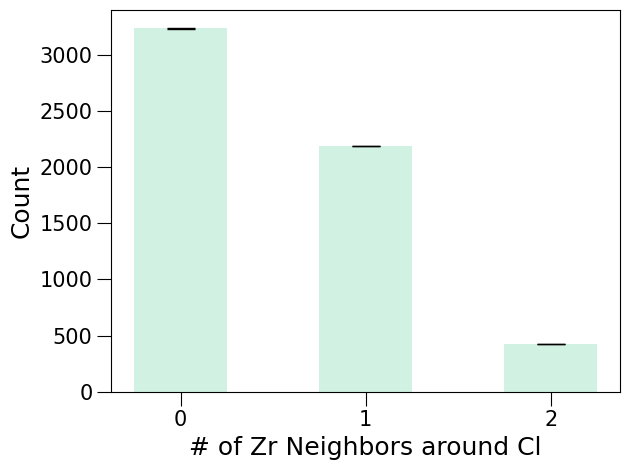

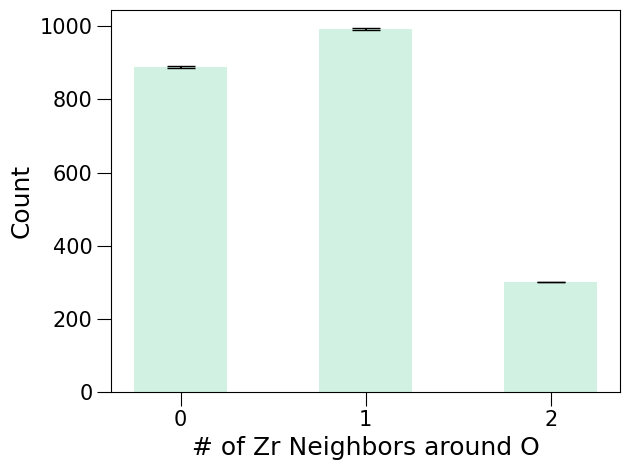

Cl-Zr average coordination number: 0.5187974214159392
O-Zr average coordination number: 0.730980751604033


In [120]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
import os

num_rp = 3

cl_values_sort_list = list()
o_values_sort_list = list()
for i in range(num_rp):
    file_tmp = os.path.join(f"RMC_run_RP{i + 1}", "clzr.dat")
    with open(file_tmp, "r") as f:
        lines = f.readlines()

    zr_num_count = list()
    for line in lines[1:]:
        if line:
            val_tmp = int(line.split()[1])
            if val_tmp <= 2:
                zr_num_count.append(val_tmp)
                
    labels, values = zip(*Counter(zr_num_count).items())
    if i == 0:
        cl_labels_sort = sorted(labels)
    values_sort = [x for _, x in sorted(zip(labels, values))]
    cl_values_sort_list.append(values_sort)

    file_tmp = os.path.join(f"RMC_run_RP{i + 1}", "ozr.dat")
    with open(file_tmp, "r") as f:
        lines = f.readlines()

    zr_num_count = list()
    for line in lines[1:]:
        if line:
            val_tmp = int(line.split()[1])
            if val_tmp <= 2:
                zr_num_count.append(val_tmp)
                
    labels, values = zip(*Counter(zr_num_count).items())
    if i == 0:
        o_labels_sort = sorted(labels)
    values_sort = [x for _, x in sorted(zip(labels, values))]
    o_values_sort_list.append(values_sort)

cl_vals_ave = list()
cl_vals_err = list()
for i in range(len(cl_labels_sort)):
    arr_tmp = np.array(cl_values_sort_list)[:, i]
    ave_tmp = np.mean(arr_tmp)
    err_tmp = np.std(arr_tmp)
    cl_vals_ave.append(ave_tmp)
    cl_vals_err.append(err_tmp)

fig, ax = plt.subplots()
ax.bar(cl_labels_sort, cl_vals_ave,
       yerr=cl_vals_err,
       align='center',
       alpha=1,
       ecolor='black',
       color=(0.82, 0.95, 0.89),
       capsize=10,
       width=0.5)
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("# of Zr Neighbors around Cl", fontsize=18)
ax.set_xticks(cl_labels_sort)
ax.set_xticklabels(cl_labels_sort, fontsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params('both', length=10, which='major')

plt.tight_layout()
plt.savefig('cl_zr_coord.png')
plt.show()

o_vals_ave = list()
o_vals_err = list()
for i in range(len(o_labels_sort)):
    arr_tmp = np.array(o_values_sort_list)[:, i]
    ave_tmp = np.mean(arr_tmp)
    err_tmp = np.std(arr_tmp)
    o_vals_ave.append(ave_tmp)
    o_vals_err.append(err_tmp)

fig, ax = plt.subplots()
ax.bar(o_labels_sort, o_vals_ave,
       yerr=cl_vals_err,
       align='center',
       alpha=1,
       ecolor='black',
       color=(0.82, 0.95, 0.89),
       capsize=10,
       width=0.5)
ax.set_ylabel("Count", fontsize=18)
ax.set_xlabel("# of Zr Neighbors around O", fontsize=18)
ax.set_xticks(o_labels_sort)
ax.set_xticklabels(o_labels_sort, fontsize=15)
ax.yaxis.set_tick_params(labelsize=15)
ax.tick_params('both', length=10, which='major')

plt.tight_layout()
plt.savefig('o_zr_coord.png')
plt.show()

sum_tmp = 0
for i in range(len(cl_labels_sort)):
    sum_tmp += (cl_labels_sort[i] * cl_vals_ave[i])
print("Cl-Zr average coordination number:", sum_tmp / sum(cl_vals_ave))

sum_tmp = 0
for i in range(len(o_labels_sort)):
    sum_tmp += (o_labels_sort[i] * o_vals_ave[i])
print("O-Zr average coordination number:", sum_tmp / sum(o_vals_ave))